# 支持向量机

## 问题的数学化表达

给定训练样本集 $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^m, y_i\in\{-1, +1\}$， 分类学习最基本的想法就是基于训练集 D 给出一个划分超平面（更一般情形是找一个分类曲面，或者称为分类连续光滑可微的函数），将不同类别分开。

<img src="figure/svm.png" width="400" hegiht="300" align=left />

我们要找的是图中红色的划分超平面，因为它到两类样本集的距离一样远，这意味着对新出现样本的分类准确性是最高的，泛化能力强。超平面的一般表达形式如下：

$$ \mathbf{w}^T \mathbf{x} + b = 0 $$

其中 $\mathbf{w} = (w_1, w_2, ... ,w_d)^T$ 是超平面的法向量，我们记超平面为 $(\mathbf{w}, b)$。样本空间点 $\mathbf{x_1}$ 到超平面 $(\mathbf{w}, b)$ 的距离为

$$d = \frac{| \mathbf{w}^T \mathbf{x_1} + b|}{|| \mathbf{w} ||}$$

$D = \{(\mathbf{x}_i, y_i)\}_{i=1}^m = D_+\cup D_-$ 将D拆分成两个类别集合。则训练样本 $(\mathbf{x}_i, y_i)$ 到 $(\mathbf{w}, b)$ 的距离为

$$d((\mathbf{x}_i, y_i);(\mathbf{w}, b)) = \frac{| \mathbf{w}^T \mathbf{x}_i + b|}{|| \mathbf{w} ||}$$

假设正例集合 $D_+$ 子集 $SubD_+$ 中的点到划分超平面的距离是 $D_+$ 到超平面的距离的最小值，记为

$$d^\star_+ = d(SubD_+;(\mathbf{w}, b)) = \min_{D_+}(\frac{| \mathbf{w}^T \mathbf{x}_i + b|}{|| \mathbf{w} ||}), \quad \mathbf{x}_i \in D_+$$

同样地，反例集合 $D_-$ 子集 $SubD_-$ 中的点到划分超平面的距离是 $D_-$ 到超平面的距离的最小值，记为

$$d^\star_- = d(SubD_-;(\mathbf{w}, b)) = \min_{D_-}(\frac{| \mathbf{w}^T \mathbf{x}_i + b|}{|| \mathbf{w} ||}), \quad \mathbf{x}_i \in D_-$$

我们希望划分超平面可以满足：

$$d^\star_+ = d^\star_-$$

即**划分超平面到两类样本的距离相同，并且这个距离越大越好。我们同时称$SubD_+$、$SubD_-$里的向量为集合 D 中的“支持向量”。**

假设 
$$| \mathbf{w}^T \mathbf{x}^\star_+ + b| = | \mathbf{w}^T \mathbf{x}^\star_- + b| = \sigma  \quad \mathbf{x}^\star_+\in SubD_+, \quad \mathbf{x}^\star_-\in SubD_-$$

$\sigma$ 就是训练集到划分超平面的“间隔”。我们通过归一化来给出求解划分超平面参数的基本型。

令
$$\left\{\begin{aligned}
\widetilde{w} &  = \frac{w}{\sigma}\\
\widetilde{b} &  = \frac{b}{\sigma}
\end{aligned}\right.$$

则 $ \widetilde{\mathbf{w}}^T \mathbf{x} + \widetilde{b} = 0 $ 等价于 $\mathbf{w}^T \mathbf{x} + b = 0$，只是等比例的缩放。

对应地有

$$| \widetilde{\mathbf{w}}^T \mathbf{x}^\star_+ + \widetilde{b}| = \frac{1}{\sigma}| \mathbf{w}^T \mathbf{x}^\star_+ + b| = 1$$

以正例集合为例，对应的间隔为

$$d^\star_+ = \widetilde{d}^\star_+ = \frac{| \widetilde{\mathbf{w}}^T \mathbf{x}^\star_+ + \widetilde{b}|}{|| \widetilde{\mathbf{w}} ||} = \frac{1}{|| \widetilde{\mathbf{w}} ||}$$

所以我们要找到具有“最大间隔”的划分超平面，等价于求满足上面约束的“间隔”的最大值：

$$\left\{\begin{aligned}
\max_{(\widetilde{w}, \widetilde{b})} \frac{2}{|| \widetilde{\mathbf{w}} ||} &\\
y_i(\widetilde{\mathbf{w}}^T \mathbf{x}_i + \widetilde{b}) & \geq \widetilde{\mathbf{w}}^T \mathbf{x}^\star_+ + \widetilde{b} = 1 \quad i = 1,2,...,m
\end{aligned}\right.$$

上式等价于（我们下面依旧采用 w、b 的记号）：

$$\left\{\begin{aligned}
\min_{(w, b)} \frac{|| \mathbf{w} ||^2}{2} &\\
s.t. \quad y_i(\mathbf{w}^T \mathbf{x}_i + b) & \geq  1 \quad i = 1,2,...,m
\end{aligned}\right. \tag{svm model}$$

这就是**支持向量机(Support Vector Machine)的基本型。**

## 对偶问题

求解参数的 svm model 是一个凸二次规划，有现成的优化计算包求解，但我们有更高效的办法。

由 **1.2 节的Lagrange对偶与KKT条件**可知对 svm model 使用 **拉格朗日乘子法** 可以得到其“对偶问题”如下：

$$\max_{\alpha \geq 0}\min_{\mathbf{w}, b} L(\mathbf{w}, b, \alpha)$$

其中:

$$ L(\mathbf{w}, b, \alpha) = \frac{|| \mathbf{w} ||^2}{2} + \sum_{i=1}^m \alpha_i(1- y_i(\mathbf{w}^T \mathbf{x}_i + b))$$

对应的KKT条件是：

$$\left\{\begin{aligned}
\nabla_{\mathbf{w},b}  L(\mathbf{w}, b, \mathbf{\alpha}) = \mathbf{0}\\
1- y_i(\mathbf{w}^T \mathbf{x}_i + b) \leq  0  \\
\alpha_i \geq 0 \\
\alpha_i (1- y_i(\mathbf{w}^T \mathbf{x}_i + b)) = 0
\end{aligned}\right. \tag{KKT}$$

**由KKT的最后一个条件可知**:
* 对于 $x \in D_{+(-)}\setminus subD_{+(-)}$的向量是不属于“支持向量”的训练样本，有$y_i(\mathbf{w}^T \mathbf{x}_i + b)>1$,所以必然有 $\alpha_i = 0$;
* 对于支持向量，有$\alpha_i \geq 0$。

以上体现出拉格朗日算子对“支持向量”的灵敏度。

将 KKT 条件中的梯度求导，得到：

$$ \mathbf{w} = \sum_{i=1}^{m} \alpha_i y_i \mathbf{x}_i$$
$$ 0  = \sum_{i=1}^{m} \alpha_i y_i$$

将上面两式带入 $L(\mathbf{w}, b, \alpha)$，可以将 $\mathbf{w}$和 b消去，得到如下的约束问题：

$$\max_{\mathbf{\alpha}} \left(\sum_{i=1}^m\alpha_i - \frac{1}{2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_{i} y_{j}\mathbf{x}^T_i\mathbf{x}_j\right)$$
s.t.
$$\left\{\begin{aligned}
0  = \sum_{i=1}^{m} \alpha_i y_i\\
1- y_i(\mathbf{w}^T \mathbf{x}_i + b) \leq  0  \\
\alpha_i \geq 0 \\
\alpha_i (1- y_i(\mathbf{w}^T \mathbf{x}_i + b)) = 0
\end{aligned}\right. \tag{KKT}$$

针对KKT的最后一个条件，记 $SV = SubD_{+}\cup SubD_{-}$为所有支持向量的集合，集合元素个数是 $n_{sv}$。

**关于$\mathbf{w}$**

解出 $\alpha$ 之后，因为对于不属于支持向量的样本， $\alpha_i = 0$,可以直接得到 $\mathbf{w}$ 为：

$$ \mathbf{w} = \sum_{i\in SV}\alpha_i y_i \mathbf{x}_i$$

**关于$b$**

对于$x\in SV$,有：

$$1- y_i(\mathbf{w}^T \mathbf{x}_i + b)=0$$

两边乘以 $y_i$， 并且关于集合 SV 中的元素进行求和，由 $y_i^2 = 1$可知

$$n_{sv}b + \mathbf{w}^T\sum_{i\in SV}\mathbf{x}_i = \sum_{i\in SV}y_i$$

所以

$$b = \frac{\sum_{i\in SV}y_i - \mathbf{w}^T\sum_{i\in SV}\mathbf{x}_i}{n_{sv}} = 
\frac{\sum_{i\in SV}y_i - \sum_{i\in SV}\sum_{j\in SV}\alpha_i y_i \mathbf{x}^T_i\mathbf{x}_j}{n_{sv}}$$

最终，我们得到了支持向量机的判别器：

$$f(\mathbf{x}) = sgn\left(\mathbf{w}^T \mathbf{x}+ b\right)
= sgn\left(\sum_{i\in SV}\alpha_i y_i \mathbf{x}_i^T \mathbf{x} + \frac{\sum_{i\in SV}y_i - \sum_{i\in SV}\sum_{j\in SV}\alpha_i y_i \mathbf{x}^T_i\mathbf{x}_j}{n_{sv}}\right)$$

## [SMO算法解Lagrange算子](https://zh.wikipedia.org/wiki/%E5%BA%8F%E5%88%97%E6%9C%80%E5%B0%8F%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95)

## 核函数

之前的我们的讨论都是基于训练集是线性可分的，存在一个划分超平面可以将训练集正确分类。实际问题中，训练集也许并不可分。我们的思路是，**将原始样本从原始空间映射到高维度的样本空间，使得样本在这个空间线性可分。**

令 $\phi(\mathbf{x})$表示将$\mathbf{x}$映射后的样本向量,于是在高维空间划分超平面对应的模型为：

$$f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x}) + b$$

和原来一样，对应的对偶问题是：

$$\max_{\mathbf{\alpha}} \left(\sum_{i=1}^m\alpha_i - \frac{1}{2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_{i} y_{j}\phi(\mathbf{x})^T_i\phi(\mathbf{x}_j)\right)$$

$$s.t. \quad \sum_{i=1}^{m} \alpha_i y_i=0 \quad \alpha_i \geq 0$$

上式涉及到计算 $\phi(\mathbf{x})^T_i\phi(\mathbf{x}_j)$，在高维空间的内积。因为**在高维甚至无穷维空间计算向量内积的复杂度是很高的，所以我们引入了“核函数”（kernal function）如下**：

$$K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i),\phi(\mathbf{x}_j)\rangle = \phi(\mathbf{x})^T_i\phi(\mathbf{x}_j)$$

将样本之间在高维空间的内积转化为在原始样本空间通过核函数计算的结果（[例子](http://www.cnblogs.com/jerrylead/archive/2011/03/18/1988406.html)）。

**$\mathbf{x}_i^T\mathbf{x}_j$ 是两个向量的内积，集合含义是衡量两个向量的相似性。引入核函数后，相当于重新定义了相似性（一般是映射到更高维度，相当于站在更高的视角（引入更多特征）来看待样本之间的相似性）。之前对于线性回归，使用多项式特征来增加特征数，本质上也是从低维度映射到高维度。**

核函数的特点：
1. 因为计算效率的缘故，我们引入了核函数，但核函数对应的映射我们并不知道，所以我们并不知道什么样的核函数是合适的，“核函数选择”是一个需要技巧的尝试。一些基本的经验是，文本数据经常采用线性核，情况不明时采用高斯核；
2. 核函数的加权和、直积、与任意函数的作用（为了保持对称，需要左右同时乘）也还是核函数。

<img src="http://zhoutao822.coding.me/2018/11/07/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA/svm3.png" width="400" hegiht="300" align=left />

注：
1. 一般意义上的多项式核表达形式为：$K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma\mathbf{x}_i^T\mathbf{x}_j + c)^n$；
2. 高斯核可以分解为一个无穷级数与其自身的乘积，也就是说高斯核对应的映射可以把特征向量映射到无线维空间里。

**一个简单的例子**

假设向量 $\mathbf{x}_1 = (a, b)^T, \mathbf{x}_2 = (1, 1)^T$，如果将二维样本映射到四维空间，映射函数为 

$$\phi(\mathbf{x}) = (x_1 x_1, x_1 x_2, x_2 x_1, x_2 x_2)^T$$

则有

$$\phi(\hat{\mathbf{x}}_1) = (a^2, ab, ba, b^2)^T, \; \phi(\hat{\mathbf{x}}_2) = (1, 1, 1, 1)^T$$

对应的高维特征向量的内积是

$$\phi(\hat{\mathbf{x}}_1)^T \phi(\hat{\mathbf{x}}_2) = a^2 + ab + ba + b^2 = (a+b)^2$$

四维空间内积的运算次数是7次（乘法和加法各算一次）。该映射对应的核函数为

$$K(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T\mathbf{x}_2)^2 = (a + b)^2$$

在二维空间多项式核函数的运算只需要3次。**对比可知，直接求解高维映射的内积相比通过核函数来计算，核函数的复杂度是很低的。**

## 核函数特性对比及算法选择

**几个核函数的特性对比如下：**

| 核函数 | 优点 | 缺点 |
| :---------------| :---------- | :---------- |
| 线性核    | 简单，运算效率高 | 对线性不可分的数据集无解 |
| 多项式核   | 可以拟合出复杂的分割超平面 | 1. 可选参数太多（3个）；2.阶数n不宜太高，否则第一项的n次方容易向0和无穷大两极走 |
| 高斯核   | 1.拟合能力最强；2.参数容易选择 | 1.映射到无限维不直观；2.计算速度慢；3.模型复杂，容易过拟合 |

**假设特征个数是n ， 样本数量是 m，按照 n 和 m 的关系来选择LR、SVM：**

| n，m量级对比关系 | (n,m)量级举例 | 模型选择 |
| :---------------| :---------- | :---------- |
| $n \gg m$ | (10000, 10-1000) | LR 或 线性核的 SVM |
| $n < m$   | (1-1000, 10-10000) | Gauss 核的 SVM |
| $n \ll m$    | (1-1000, 50000+) | 多项式核 或 Gauss核的SVM |

**更一般的算法选择原则是：**

1. 针对数据量很大的问题，可以选择复杂一点的模型，虽然容易过拟合，但因为数据量大，可以有效弥补过拟合；
2. 如果数据量比较小，一般要选择简单一点的模型，否则很容易造成过拟合，此时也要特别注意模型是否欠拟合，如果出现欠拟合，可以通过增加多项式特征来纠正欠拟合问题。

## 软间隔与正则化

在“核函数”这一节，我们对于不可分的训练集采用的办法是通过核函数来进行“升维”，这里面除了很难确定合适的核函数外，即使找到了某个核函数利于训练集在高维空间的线性可分，也很难断定是否是因为过拟合造成的。

缓解该问题的一个办法是允许支持向量机在一些样本上出错。也就是我们下面要引入的“软间隔”概念。

_**针对线性不可分这个问题，“核函数”和“软间隔”是两种完全不同的思路（可以同时考虑两个手段），前者相当于改变数据结构，后者把心思花在允许“舍弃”部分数据来解决问题。**_

软间隔允许部分样本不满足约束，即这部分不满足约束的样本满足下式

$$ y_i(\mathbf{w}^T \mathbf{x}_i + b)< 1$$

我们的优化目标变成：“最大化间隔的同时，不满足约束的样本应该尽可能少”。对应的优化目标为：
$$
\min_{(w, b)} \frac{|| \mathbf{w} ||^2}{2} + C\sum_{i=1}^m \ell_{0/1}\left(y_i(\mathbf{w}^T \mathbf{x}_i + b)-1\right)
 \tag{soft svm}$$

其中 C>0 是一个常数， $\ell_{0/1}$ 是“0/1损失函数”：
$$ \ell_{0/1}(z)=
\left \{
\begin{aligned}
1 & \quad if \; z<0;\\
0 & \quad if \; z\geq 0;. 
\end{aligned}\right.$$

显然，C 无穷大时，等价于 (svm model)，C 取有限值时，允许一些样本不满足约束。

然而， $\ell_{0/1}$ 非凸、非连续，不利于 (soft svm) 的求解，我们通常用如下三种“替代损失”来代替：

1. hinge损失：$\ell_{hinge}(z) = \max(0, 1-z)$;
2. 指数损失（exponential loss）: $\ell_{exp}(z) = \exp(-z)$;
3. 对率损失（logistic loss）: $\ell_{log}(z) = \log(1+ \exp(-z))$

<img src="https://hacking-linux.com/wp-content/uploads/2018/08/28.png" width="400" hegiht="300" align=left />

下面以hinge损失为替代损失，则 （soft svm）变为：

$$
\min_{(w, b)} \frac{|| \mathbf{w} ||^2}{2} + C\sum_{i=1}^m \max\left(0, y_i(\mathbf{w}^T \mathbf{x}_i + b)-1\right)
 \tag{hinge loss svm}$$

引入松弛变量$\xi_i \geq 0$，可将上式重写为：

$$\left\{\begin{aligned}
\min_{(w, b, \xi_i)} \frac{|| \mathbf{w} ||^2}{2} + C\sum_{i=1}^m \xi_i&\\
s.t. \quad y_i(\mathbf{w}^T \mathbf{x}_i + b) & \geq 1 - \xi_i \quad i = 1,2,...,m\\
\xi_i \geq 0
\end{aligned}\right. \tag{soft margin svm}$$

**对于传统的SVM，此处对应的“硬间隔”是 1，对应此处的“软间隔”为 $1 - \xi_i$，相当于间隔带向靠近分类器的方向移动了$\xi_i$个单位。C 表示对违反间距规则的样本的“惩罚”，C选择一个很大的值时，目标函数对违反间距规则的点的“惩罚”是很大的，反之，违反点的“付出代价”不是很大。**

对应的拉格朗日对偶问题以及KKT条件如下：

$$ L(\mathbf{w}, b, \alpha, \mathbf{\xi}, \mathbf{\mu}) = \frac{|| \mathbf{w} ||^2}{2} + \sum_{i=1}^m \alpha_i\left(1- \xi -y_i(\mathbf{w}^T \mathbf{x}_i + b)\right) - \sum_{i=1}^m \mu_i\xi_i$$

$$\max_{\mathbf{\alpha}} \left(\sum_{i=1}^m\alpha_i - \frac{1}{2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_{i} y_{j}\mathbf{x}^T_i\mathbf{x}_j\right)$$
s.t.
$$\left\{\begin{aligned}
\sum_{i=1}^{m} \alpha_i y_i= 0\\
1- y_i(\mathbf{w}^T \mathbf{x}_i + b) - \xi_i\leq  0  \\
0\leq \alpha_i \leq C \\
\alpha_i (1- y_i(\mathbf{w}^T \mathbf{x}_i + b) - \xi_i) = 0 \\
\xi_i \geq 0 ,\; \mu_i \geq 0,\; \mu_i\xi_i = 0
\end{aligned}\right. \tag{hinge soft KKT}$$

(hinge soft KKT) 和 (KKT) 对比，唯一的差别是对偶变量的约束不同，前者是$0\leq \alpha_i \leq C$，后者只是 $0\leq \alpha_i$。
我们同样可以采用SMO算法来求解、核函数来进行扩展。

由(hinge soft KKT)可知，最终模型仍旧只和支持向量有关，通过采用hinge损失函数保持稀疏性。

除了hinge损失，我们可以采用指数损失和对率损失来进行求解。采用对率损失的时候，几乎就得到了对率回归模型。两者的对比在于：
* 对率回归的优势在于输出有自然概率意义的label,SVM输出不具有，当然可以通过特殊处理可以得到；
* 对率回归可以直接用于多分类任务，SVM需要进行推广；
* SVM的计算开销主要集中在“支持向量”，具有稀疏性，对率回归不具有这个概念。

更一般地，有如下学习模型：

$$\min_f \Omega(f) + C\sum_{i=1}^{m} \ell\left(f(\mathbf{x}_i), y_i\right)$$

其中$\Omega(f)$称为“结构风险”，用于描述 f 的一些性质；第二项称为“经验风险”，用于描述模型与训练数据的契合程度；C用于对两者折中。

从**经验风险最小化（可以理解为模型和训练数据的误差）**角度看：
1. $\Omega(f)$ 描述我们希望获得具有何种性质的模型，为引入领域知识（比如不同领域减少特征的方式不同）和用途意图提供途径；
2. $\Omega(f)$ 有助于削减空间（作为约束），降低最小化训练误差的过拟合风险。

所以也称上式为“正则化”问题， $\Omega(f)$称为正则化项，$L_p$常用于正则化项，其中$L_2$ 倾向于分量取值均衡化，即非零分量个数稠密，$L_0$和$L_1$倾向于分量足够稀疏，即非零分量个数尽量少。

## [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
1. [参数解释参考](https://blog.csdn.net/szlcw1/article/details/52336824)
2. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples
3. [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf)

## [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
1. [参数解释参考](https://blog.csdn.net/ustbclearwang/article/details/81236732)
2. it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples

## 乳腺癌检测

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))

data shape: (569L, 30L); no. positive: 357; no. negative: 212


可以看出我们的数据集很小，如果采用高斯核函数会过于复杂，容易过拟合，模型效果不会很好，我们验证下我们的猜测：

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.svm import SVC
for gamma in [0.1, 0.001, 0.0001]:
    clf = SVC(C=1.0, kernel='rbf', gamma=gamma)

    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    print 'train_score: {0};test_score:{1}'.format(train_score, test_score)

train_score: 1.0;test_score:0.631578947368
train_score: 0.978021978022;test_score:0.90350877193
train_score: 0.956043956044;test_score:0.921052631579


train_score 接近满分，test_score 评分低，典型的过拟合现象。随着gamma的减小，过拟合现象减轻，但整体评分都下降，欠拟合了。我们可以通过 GridSearchCV 来看最好的模型交叉验证得分是多少。 

best param:{'gamma': 0.00010344827586206896}; best_cv_score:0.934973637961


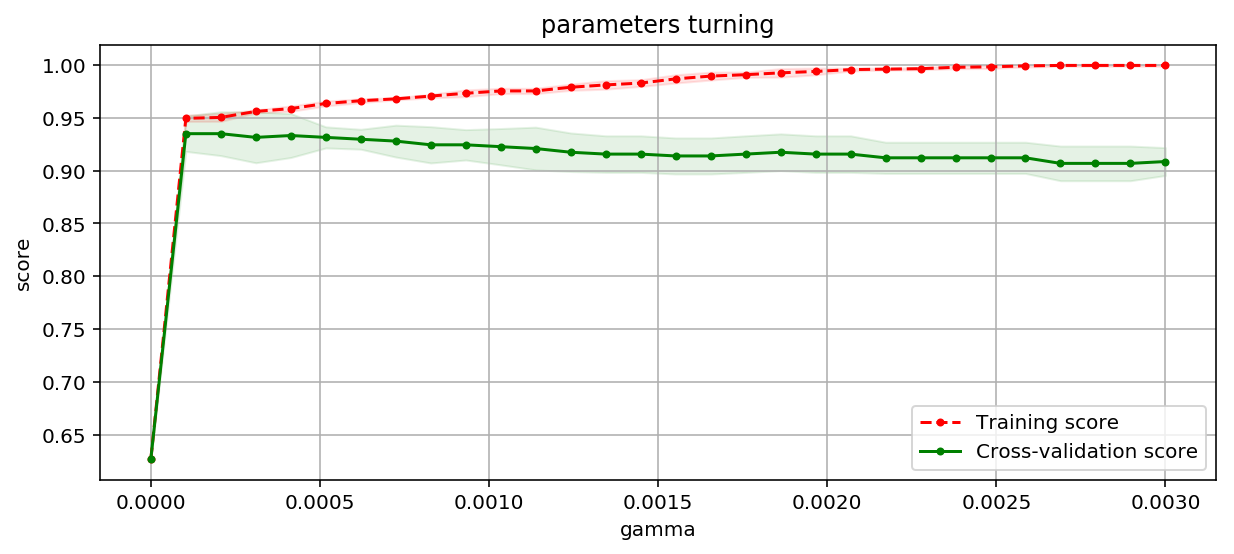

In [20]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.003, 30)
param_grid = {'gamma': gammas}
clf = GridSearchCV(SVC(), param_grid, cv=5)
clf.fit(X,y)

print 'best param:{0}; best_cv_score:{1}'.format(clf.best_params_, clf.best_score_)

plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

即使最好的gamma参数下，平均最优得分也只是 0.93。我们选择在gamma为0.01时，画出学习曲线，更直观观察拟合情况。

elaspe: 0.953430


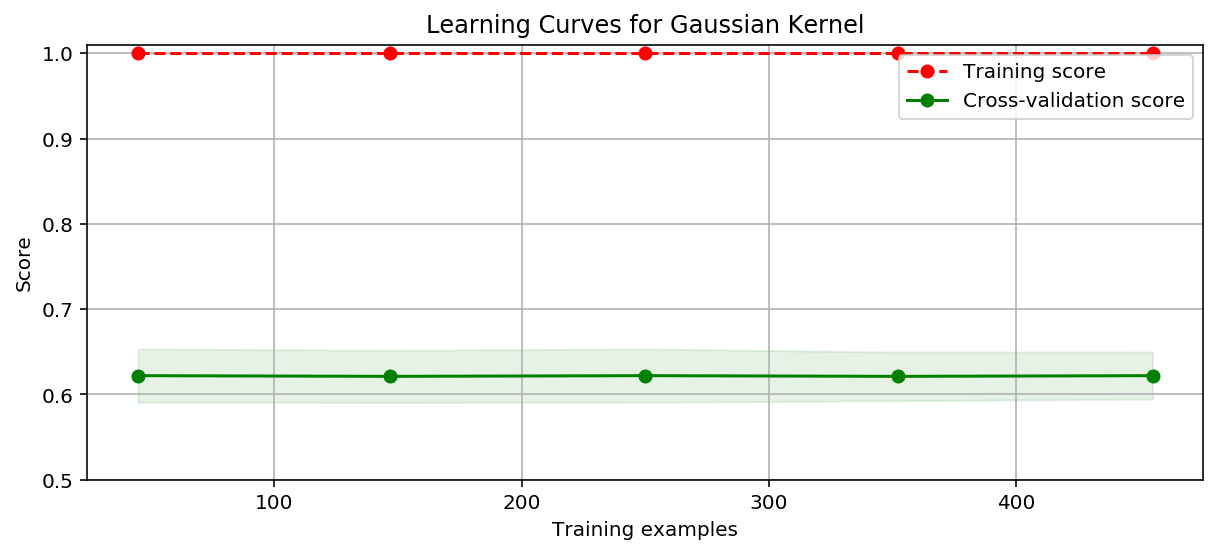

In [21]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

两个得分之间间隙非常大，且train_score 接近满分，是明显的过拟合现象。我们换个模型，采用二阶多项式核函数来拟合模型，来看看如何。

In [22]:
clf = SVC(C=1.0, kernel='poly', gamma=1, degree=2)

clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print 'train_score: {0};test_score:{1}'.format(train_score, test_score)

train_score: 0.982417582418;test_score:0.956140350877


结果看起来好多了，但运算时间较长。作为对比，我们画出一阶、二阶、三阶多项式的学习曲线，观察模型的拟合情况。

elaspe: 276.055873


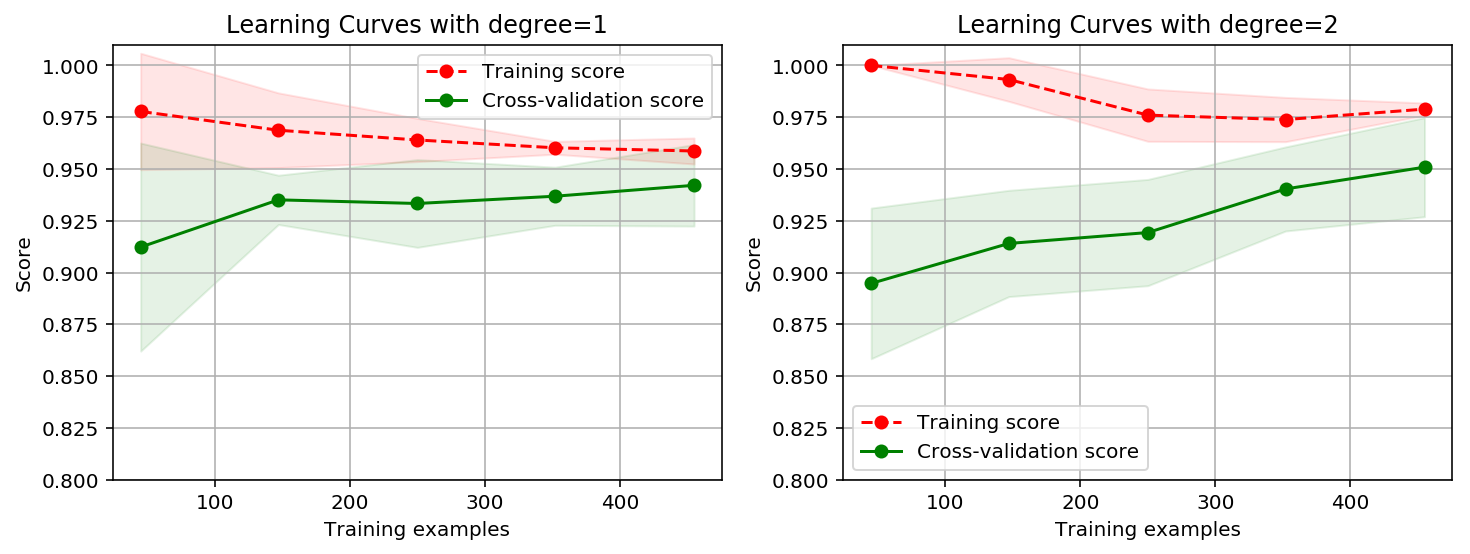

In [4]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)

print('elaspe: {0:.6f}'.format(time.clock()-start))

从图中可以看出，二项式的拟合效果更好。在LR章节，我们用逻辑回归来处理时，用二项多项式来增加特征，同时采用L1范数作为正则项，拟合效果比这里的SVC更好，更重要的是，L1的运算效率远远高于二阶多项式的SVC。由此可见，**模型选择和参数调优，在工程实践中有着非常重要的作用。**

下面我们试试试着用LinerSVC来解决这个问题，指定penalty 为L1范数作为正则项来构造SVM，并使用PolynomialFeatures引入二阶多项式特征。

**注：使用二阶多项式核函数和引入二阶多项式特征完全是两回事。**

In [17]:
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_svc = LinearSVC(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_svc", linear_svc)])
    return pipeline

# 用二阶多项式增加特征，L1范数作为正则惩罚项
# 注: loss 是 'hinge' 的时候， penalty 为 'l1'、'l2'都会报错。原因未知。？？？
model = polynomial_model(degree=2, penalty='l1', loss='squared_hinge', dual=False)

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(
    time.clock()-start, train_score, cv_score))

elaspe: 0.738189; train_score: 1.000000; cv_score: 0.982456


当采用 LinearSVC 且penalty = 'l1' 、loss = 'squared_hinge'、 采用二阶多项式特征的时候，效果和LR 采用 l1 为惩罚项、加二阶多项式特征效果差不多。

# 支持向量回归SVR（support vector regression）

## SVM 的延伸

传统回归模型输出 $f(\mathbf{x})$ 和 y 之间的误差来计算损失，当且仅当两者完全相同时，误差才为0。SVR 和传统回归模型不同的是，**SVR 假设我们能容忍 $f(\mathbf{x})$ 和 y 之间最多能有 $\epsilon$ 的误差**。即损失函数为hinge损失：

$$\ell_{\epsilon}(z) = max(0, |z|-\epsilon)$$

**这相当于以 $f(\mathbf{x})$ 为中心，构造了一个宽度为 $\epsilon$ 的间隔带，落入带内的训练样本被认为是预测正确的。**

<img src="http://www.yyxx5.com/img/aHR0cDovL2ltZzAuaW1ndG4uYmRpbWcuY29tL2l0L3U9MjU3ODAzNDM2MiwzMTE2ODg2Nzc0JmZtPTI2JmdwPTAuanBn.jpg" width="400" hegiht="300" align=left />

于是, SVR 的问题可以视为：

$$\min_{\mathbf{w}, b} \left(  \frac{||\mathbf{w}||}{2} + C\sum_{i=1}^m\ell_{\epsilon}(|f(\mathbf{x}_i) - y_i|)\right)$$

对不属于间隔带内上侧和下侧的点引入松弛变量 $\xi_i,\hat{\xi}_i$，显然有 $\xi_i\hat{\xi}_i=0$，上式可重写为：

$$\min_{\mathbf{w}, b, \xi_i,\hat{\xi}_i} \left( \frac{||\mathbf{w}||}{2} + C\sum_{i=1}^m(\xi_i + \hat{\xi}_i))\right)$$

$$\begin{split}s.t. \;& \left(f(\mathbf{x}_i) - y_i \right) \leq \epsilon + \xi_i\\
& \left( y_i - f(\mathbf{x}_i) \right) \leq \epsilon + \hat{\xi}_i\\
& \xi_i \geq 0, \; \hat{\xi}_i \geq 0, \; \xi_i\hat{\xi}_i=0
\end{split}$$

**引入松弛变量后，间隔带的间隔分别变成了$\epsilon + \xi_i$ 和 $\epsilon + \hat{\xi}_i$。**

对应的拉格朗日对偶问题以及KKT条件如下：

$$\begin{split}
& L(\mathbf{w}, b, \alpha, \hat{\alpha}, \mathbf{\xi}, \hat{\mathbf{\xi}}, \mathbf{\mu}, \hat{\mathbf{\mu}}) \\ 
& =\frac{|| \mathbf{w} ||^2}{2} + C\sum_{i=1}^m(\xi_i + \hat{\xi}_i) - \sum_{i=1}^m \mu_i\xi_i - \sum_{i=1}^m \hat{\mu}_i\hat{\xi}_i \\ 
& +\sum_{i=1}^m \alpha_i\left((\mathbf{w}^T \mathbf{x}_i + b)- y_i - \xi_i -{\epsilon}\right) +
\sum_{i=1}^m \hat{\alpha}_i\left(y_i - (\mathbf{w}^T \mathbf{x}_i + b) - \hat{\xi}_i -{\epsilon}\right).
\end{split}$$

其中的拉格朗日乘子都非负。

$$ \begin{split}
\max_{\mathbf{\alpha}, \hat{\mathbf{\alpha}}} 
\left( \sum_{i=1}^m y_i(\hat{\alpha}_i - \alpha_i) - \epsilon(\hat{\alpha}_i + \alpha_i)  - 
\frac{1}{2} \sum_{i=1}^{m}\sum_{j=1}^{m} (\hat{\alpha}_i - \alpha_i)(\hat{\alpha}_j - \alpha_j) \mathbf{x}^T_i\mathbf{x}_j\right)
\end{split}$$

s.t.
$$\left\{\begin{aligned}
\mathbf{w} = \sum_{i=1}^m (\hat{\alpha}_i - \alpha_i)\mathbf{x}_i ,\; 0 = \sum_{i=1}^m (\hat{\alpha}_i - \alpha_i), 
C = \alpha_i + \mu_i,\; C = \hat{\alpha}_i + \hat{\mu}_i,\\
\left(f(\mathbf{x}_i) - y_i \right) - \xi_i-\epsilon  \leq 0,\;\left( y_i - f(\mathbf{x}_i) \right) - \hat{\xi}_i - \epsilon \leq 0,\\
-\xi_i \leq 0, \; -\hat{\xi}_i \leq 0,\\
\alpha_i \geq 0, \; \hat{\alpha}_i \geq 0, \mu_i \geq 0, \; \hat{\mu}_i \geq 0,\\
\sum_{i=1}^{m} \alpha_i (\left(f(\mathbf{x}_i) - y_i \right) - \xi_i-\epsilon) =0\\
\sum_{i=1}^{m} \alpha_i (\left( y_i - f(\mathbf{x}_i) \right) - \hat{\xi}_i - \epsilon)= 0\\
\mu_i\xi_i = 0, \; \hat{\mu}_i\hat{\xi}_i = 0,\\
\xi_i\hat{\xi}_i=0,\; \alpha_i\hat{\alpha}_i=0
\end{aligned}\right. \tag{hinge loss SVR KKT}$$

通过求解相关系数(通过SMO 以及 KKT条件)，可以得到我们的SVR模型：

$$f(\mathbf{x}) = \sum_{i=1}^m (\hat{\alpha}_i - \alpha_i)\mathbf{x}^T_i\mathbf{x} + b$$

## [sklearn.svm.SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)